In [13]:
import matplotlib.pyplot as mpl
import matplotlib.font_manager

import numpy as np

rng = np.random.default_rng(1)

In [35]:
def gaussian(x, mu, std):
    return np.exp( - (x-mu)**2 / (2*std**2/4))

def half_gaussian(x, mu, std):
    results = np.zeros_like(x)
    results[x<mu] = np.exp( - (x[x<mu]-mu)**2 / (2*std**2/4))
    results[x>=mu] = np.exp( - (x[x>=mu]-mu)**2 / (2*std**2))
    return results

def gaussian_2d(mu, std):
    x, y = np.meshgrid(np.linspace(0,1,50), np.linspace(0,1,50))
    d = np.sqrt((x-mu)**2+(y-mu)**2)
    g = 50 * np.exp(-( d/ ( 2.0 * std**2 ) ) )
    return rng.poisson(g)


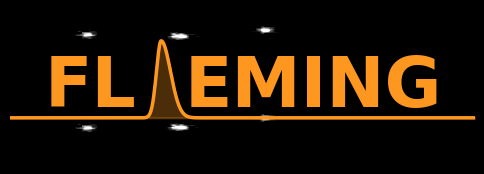

In [71]:
bg_color = "black"
fg_color = "#fd971f"
fig, ax = mpl.subplots(figsize=(6,2))

t_start = 0.075

# with mpl.xkcd():
ax.text(t_start,0.5, "FL", weight="bold",color = fg_color, fontsize=50,va="center")
ax.text(t_start+0.3,0.5, "EMING", weight="bold",color = fg_color, fontsize=50, va="center")

l = np.linspace(0,1,1000)
l_start = 0.3
g_line = half_gaussian(l,t_start+ 0.25 ,0.02)/2 + l_start 
ax.plot(l, g_line, color = fg_color)
ax.fill_between(l, l_start, g_line, color=fg_color, alpha=0.3)

for i in range(3):
    mu = 0.5
    g = gaussian_2d(mu, 0.1).astype(np.float32)
    g = np.ma.masked_less_equal(g , 0.0001*np.amax(g))

    xc = rng.uniform(0.1,0.9)
    yc = rng.uniform(0.05,0.3)
    yc2 = rng.uniform(0.7,0.95)

    w = 0.2
    ax.imshow(g, extent=(xc-w,xc+w,yc-w,yc+w), cmap="gray", vmax=0.5*np.amax(g), aspect="auto")
    ax.imshow(g, extent=(xc-w,xc+w,yc2-w,yc2+w), cmap="gray", vmax=0.5*np.amax(g), aspect="auto")

ax.set_xlim(0,1)
ax.set_ylim(0,1)
for side in ["left","right","top","bottom"]:
    ax.spines[side].set_visible(False)
ax.grid(False)
ax.set_facecolor(bg_color)
ax.tick_params(which="both", left=False, bottom=False, labelleft=False, labelbottom =False)
fig.set_facecolor(bg_color)